In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/DontGetKicked/example_entry.csv
/kaggle/input/DontGetKicked/training.zip
/kaggle/input/DontGetKicked/Carvana_Data_Dictionary.txt
/kaggle/input/DontGetKicked/test.zip
/kaggle/input/DontGetKicked/training.csv
/kaggle/input/DontGetKicked/test.csv


In [68]:
train = pd.read_csv('/kaggle/input/DontGetKicked/training.csv')
test = pd.read_csv('/kaggle/input/DontGetKicked/test.csv')
sub = pd.read_csv('/kaggle/input/DontGetKicked/example_entry.csv')

In [3]:
alldata = pd.concat([train,test])
alldata

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0.0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0.0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0.0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0.0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0.0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,NaN,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,NaN,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,NaN,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,NaN,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [32]:
alldata['PurchDate'] = pd.to_datetime(alldata['PurchDate'])
alldata['year'] = alldata['PurchDate'].dt.year
alldata['month'] = alldata['PurchDate'].dt.month
alldata['day'] = alldata['PurchDate'].dt.day

In [33]:
alldata2 = alldata.drop(columns=['IsBadBuy','RefId','PurchDate'])
alldata2

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633,2010,11,17
48703,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594,2010,11,17
48704,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594,2010,11,17
48705,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038,2010,11,17


In [34]:
alldata2['Auction'].unique()

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

In [35]:
alldata2['Auction'] = alldata2['Auction'].replace({'ADESA':0,'OTHER':1,'MANHEIM':2})
alldata2

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,0,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,0,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,0,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,0,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,0,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633,2010,11,17
48703,2,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594,2010,11,17
48704,2,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594,2010,11,17
48705,2,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038,2010,11,17


In [36]:
alldata2['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'GMC', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP', 'HONDA', 'OLDSMOBILE', 'BUICK',
       'SCION', 'VOLKSWAGEN', 'ISUZU', 'LINCOLN', 'MINI', 'SUBARU',
       'CADILLAC', 'VOLVO', 'INFINITI', 'PLYMOUTH', 'LEXUS', 'ACURA',
       'TOYOTA SCION', 'HUMMER'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
alldata2['Make'] = le.fit_transform(alldata2['Make'])
alldata2

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,0,2006,3,17,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,0,2004,5,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,0,2005,4,5,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,0,2004,5,5,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,0,2005,4,6,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2,2005,5,6,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633,2010,11,17
48703,2,2007,3,29,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594,2010,11,17
48704,2,2006,4,14,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594,2010,11,17
48705,2,2005,5,17,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038,2010,11,17


In [70]:
c = alldata2.columns[alldata2.dtypes== object]#list는 조건을 쓸 수 있다!  문자형칼럼에 접근 object는 따옴표있어도 괜춘없어도 상관없음
c#전체 데이터에 접근한다. 

Index(['Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST'],
      dtype='object')

In [72]:
for i in c:
    alldata2[i] = le.fit_transform(alldata2[i]) #i에 따옴표 필요없엉
alldata2 
#alldata2를 for문에 돌려야해요. train과 test를 따로 하면은 레이블이 다르게 적용될 수 있어요!


,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,hour
0,0,2006,3,17,620,135,236,13,0,1.0,0,89046,2,5,3,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,2,2,21973,33619,5,7100.0,0,1113,0
1,0,2004,5,5,0,94,826,15,0,1.0,0,93593,0,4,0,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,2,2,19638,33619,5,7600.0,0,1053,0
2,0,2005,4,5,938,99,311,7,0,2.0,1,73807,0,5,0,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,2,2,19638,33619,5,4900.0,0,1389,0
3,0,2004,5,5,700,99,165,14,0,1.0,0,65617,0,0,0,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,2,2,19638,33619,5,4100.0,0,630,0
4,0,2005,4,6,389,129,55,14,1,2.0,1,69367,0,0,1,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,2,2,19638,33619,5,4000.0,0,1020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2,2005,5,6,386,85,292,1,0,1.0,0,88645,0,2,1,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,2,2,20928,33411,5,7955.0,0,1633,0
48703,2,2007,3,29,241,9,198,5,0,2.0,1,81862,3,0,3,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,2,2,20928,33411,5,7035.0,0,594,0
48704,2,2006,4,14,912,23,210,1,0,2.0,1,82451,2,5,3,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,0,0,20928,33411,5,6335.0,0,594,0
48705,2,2005,5,17,620,136,223,14,0,1.0,0,75760,2,5,3,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,0,0,20928,33411,5,8055.0,0,1038,0


In [38]:
pd.options.display.max_rows=999
alldata2.head(20)

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,0,2006,3,17,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,0,2004,5,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,0,2005,4,5,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,0,2004,5,5,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,0,2005,4,6,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
5,0,2004,5,20,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,2009,12,7
6,0,2004,5,14,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,2966.0,4038.0,6240.0,8496.0,2980.0,4115.0,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533,2009,12,7
7,0,2005,4,6,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,2.0,Covers,65805,AMERICAN,MEDIUM,FORD,3313.0,4342.0,6667.0,7707.0,3713.0,4578.0,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825,2009,12,7
8,0,2007,2,14,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,6196.0,7274.0,9687.0,10624.0,6417.0,7371.0,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482,2009,12,7
9,0,2007,2,6,FIVE HUNDRED,SEL,4D SEDAN SEL,RED,AUTO,1.0,Alloy,84872,AMERICAN,LARGE,FORD,7845.0,9752.0,11734.0,13656.0,9167.0,10988.0,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633,2009,12,7


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='IsBadBuy', ylabel='WheelType'>

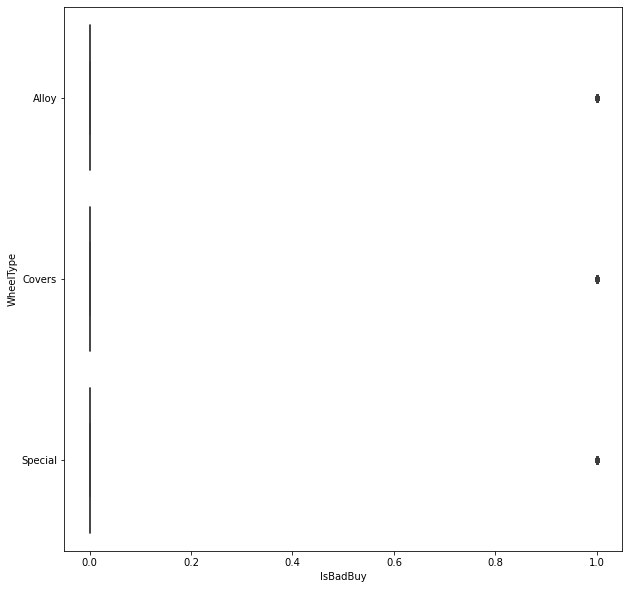

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(alldata['IsBadBuy'],alldata['WheelType'])
#boxplot은 수치와 카테고리
#countplot 둘다 카테고리
#scatterplot은 둘다 수치

In [40]:
alldata['Model'].unique()

array(['MAZDA3', '1500 RAM PICKUP 2WD', 'STRATUS V6', ..., 'ENVOY 4WD V8',
       'GTO 5.7L V8 SFI', 'PILOT 2WD'], dtype=object)

In [41]:
alldata2['Model'] = le.fit_transform(alldata2['Model'])
alldata2['Trim'] = le.fit_transform(alldata2['Trim'])
alldata2['SubModel'] = le.fit_transform(alldata2['SubModel'])
alldata2['Color'] = le.fit_transform(alldata2['Color'])
alldata2['Transmission'] = le.fit_transform(alldata2['Transmission'])

In [42]:
alldata2['WheelType'] = le.fit_transform(alldata2['WheelType'])
alldata2['VehOdo'] = le.fit_transform(alldata2['VehOdo'])
alldata2['Nationality'] = le.fit_transform(alldata2['Size'])
alldata2['TopThreeAmericanName'] = le.fit_transform(alldata2['TopThreeAmericanName'])
alldata2['Size'] = le.fit_transform(alldata2['Size'])
alldata2['PRIMEUNIT'] = le.fit_transform(alldata2['PRIMEUNIT'])
alldata2['AUCGUART'] = le.fit_transform(alldata2['AUCGUART'])
alldata2['VNST'] = le.fit_transform(alldata2['VNST'])


In [43]:
pd.options.display.max_columns=999
alldata2

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,0,2006,3,17,620,135,236,13,0,1.0,0,42893,5,5,3,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,2,2,21973,33619,5,7100.0,0,1113,2009,12,7
1,0,2004,5,5,0,94,826,15,0,1.0,0,46286,4,4,0,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,2,2,19638,33619,5,7600.0,0,1053,2009,12,7
2,0,2005,4,5,938,99,311,7,0,2.0,1,28360,5,5,0,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,2,2,19638,33619,5,4900.0,0,1389,2009,12,7
3,0,2004,5,5,700,99,165,14,0,1.0,0,20702,0,0,0,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,2,2,19638,33619,5,4100.0,0,630,2009,12,7
4,0,2005,4,6,389,129,55,14,1,2.0,1,24115,0,0,1,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,2,2,19638,33619,5,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2,2005,5,6,386,85,292,1,0,1.0,0,42529,2,2,1,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,2,2,20928,33411,5,7955.0,0,1633,2010,11,17
48703,2,2007,3,29,241,9,198,5,0,2.0,1,36149,0,0,3,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,2,2,20928,33411,5,7035.0,0,594,2010,11,17
48704,2,2006,4,14,912,23,210,1,0,2.0,1,36710,5,5,3,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,0,0,20928,33411,5,6335.0,0,594,2010,11,17
48705,2,2005,5,17,620,136,223,14,0,1.0,0,30249,5,5,3,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,0,0,20928,33411,5,8055.0,0,1038,2010,11,17


In [44]:
alldata2 = alldata2.fillna(-1) #boost은 결측치가 있어도 돌아갑니다! 하지만 random은 불가해요!!!

In [45]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1) #-1은 최대값을 쓴다. 최종 많은거는 4개이다. #데이터가 많으면 시간이 걸려요. 10만개정도면 많으니깐 cpu를 다 쓰지 않아요. 캐글은 최대 4개
rfc.fit(train2,train['IsBadBuy'])
result = rfc.predict_proba(test2) #분류는 꼭!! predict_proba로 하세요!

In [81]:
result[:50]
#칼럼이 2개인 경우가 0과 1이 나오는 거니깐!! 왼쪽은 0 사기가 아닌 확률 , 오른쪽 1은 사기를 당할 확률 
#보통은 1이 중요한거니깐 오른쪽을 제출합니다!
#이대로 넣으면 자동으로 왼쪽이 나와요! 그러니 반드시 오른쪽에 접근하는 코드를 배웁시다!!

array([[0.91, 0.09],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.8 , 0.2 ],
       [0.16, 0.84],
       [0.76, 0.24],
       [0.9 , 0.1 ],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.46, 0.54],
       [0.9 , 0.1 ],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.83, 0.17],
       [0.9 , 0.1 ],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.81, 0.19],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.36, 0.64],
       [0.91, 0.09],
       [0.95, 0.05],
       [0.74, 0.26],
       [0.86, 0.14],
       [0.79, 0.21],
       [0.9 , 0.1 ],
       [0.84, 0.16],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.29, 0.71],
       [0.31, 0.69],
       [0.94, 0.06],
       [0.63, 0.37],
       [0.89, 0.11],
       [0.95, 0.05],
       [0.82, 0.18],
       [0.93, 0.07],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.92,

In [ ]:
#분류를 할 때 제대로 하지 않아서 입니다. 
#기존에는 regression문제였다. 
#분류에 있어서 너무 이분법적으로 모델이 판단합니다. 
#현재는 정도가 없습니다. 대출을 잘 갚는 사람중에서도 아슬아슬한 사람과...1%만큼 잘 갚는 사람이 있을 것입니다. 퍼센테이지로 알아낼 수 있습니다. 

#충분히 잘 갚는지 아닌지...퍼센테이지 49% 51%는 잘 낼 수도 있는 사람..일지도..
#거의 대부분의 분류문제는 확률값으로 나가게 해야합니다!
#제출할 때 꼭 확률로 제출하지 않아도 됩니다. 
#95%의 대회는 확률로 나옵니다!ㅎ


In [79]:
test

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [47]:
pd.Series(rfc.feature_importances_,index=train2.columns).sort_values(ascending=False)

WheelTypeID                          0.083993
WheelType                            0.065585
VehOdo                               0.053382
VehBCost                             0.051025
MMRCurrentRetailAveragePrice         0.043158
MMRAcquisitionAuctionAveragePrice    0.042907
MMRAcquisitionAuctionCleanPrice      0.042452
MMRCurrentAuctionAveragePrice        0.041936
MMRCurrentRetailCleanPrice           0.041901
MMRAcquisitonRetailCleanPrice        0.041744
MMRCurrentAuctionCleanPrice          0.041661
MMRAcquisitionRetailAveragePrice     0.041242
VNZIP1                               0.040115
day                                  0.037763
BYRNO                                0.035679
WarrantyCost                         0.032533
month                                0.029417
Model                                0.027197
VNST                                 0.026938
Color                                0.025907
SubModel                             0.025746
Auction                           

In [82]:
sub['IsBadBuy'] = result[:,-1]#조건을 주는 대괄호 쉼표를 기준으로 왼쪽은 row 오른쪽이 colm
#현재는 이진분류, 나중에는 다중분류!를 배우도록 하겠습니다~!ㅎ
sub

,RefId,IsBadBuy
0,73015,0.09
1,73016,0.07
2,73017,0.03
3,73018,0.20
4,73019,0.84
...,...,...
48702,121742,0.11
48703,121743,0.09
48704,121744,0.06
48705,121745,0.11


In [83]:
sub.to_csv('dont_할수있당.csv',index=0)

In [ ]:
#label encoder 와 fillna-1로 채우니깐 0.10336점으로 477등이 나옴
#날짜 칼럼을 추가하니깐 0.10347점으로 점수가 더 좋아짐


#날짜 칼럼을 추가해보았습니다. #하면서 궁금한 점은 트리형모델들은 학습에 좋지 않는 feature를 지닌 칼럼은 자동으로 딴 주머니로 넣어주니
#일단은 칼럼을 많이 만들어 놓는게 좋은걸까요?? 그렇다.!!!!  몇백개 천개미만은 가능합니다!!
#중요한 칼럼을 찾을 때는 어떻게 접근을 해야하는지 모르겠습니다. 
#le.fit_transform(alldata2['label'])이거를 한번에 해결하는 for문 코드 알려주세요. 



###모델이 확인했을 때는 칼럼에서 카테고리가 많으면 더 중요하다고 생각한다...ㅎ수치데이터는 그렇게 판단하지는 않습니다!!! 이상하네~~!
##알아서 숫자형 칼럼과 카테고리적인 느낌의 칼럼을 구분할 수 있습니다. 


In [ ]:
#roc,auc곡선은 나름대로 우리의 모델이 0.4라고 예측했다면.. 
#roc곡선! 지니계수를 찾아보기
# roc 0.5까지이니..구분이 좀 덜 됩니다. 
#지니계수는 0~1이기에 구분이 좀 더 잘 됩니다!